<a href="https://colab.research.google.com/github/Anyicee/Novapay-financial-fraud-/blob/main/nova_financial_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('nova_pay_combined.csv')
print(df.shape)
df.head(5)

Saving nova_pay_combined.csv to nova_pay_combined.csv
(11400, 26)


,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,US,USD,CAD,ATM,278.19,278.19,4.25,...,0.123,standard,263,0.522,0,0.223,0,0,0.0,0
1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38.468549+00:00,CA,CAD,MXN,web,208.51,154.29,4.24,...,0.569,standard,947,0.475,0,0.268,0,1,0.0,0
2,fc855034-3ea5-4993-9afa-b511d93fe5e8,6d0d9b27-fa26-45f8-93b1-2df29d182d9c,2022-10-03 23:02:43.468549+00:00,US,USD,CNY,mobile,160.33,160.33,2.70,...,0.437,enhanced,367,0.939,0,0.176,0,0,0.0,0
3,2cf8c08e-42ec-444d-a755-34b9a2a0a4ca,7bd5200c-5d19-44f0-9afe-8b339a05366b,2022-10-04 01:08:53.468549+00:00,US,USD,EUR,mobile,59.41,59.41,2.22,...,0.594,standard,147,0.551,0,0.391,0,0,0.0,0
4,d907a74d-b426-438d-97eb-dbe911aca91c,70a93d26-8e3a-4179-900c-a4a7a74d08e5,2022-10-04 09:35:03.468549+00:00,US,USD,INR,mobile,200.96,200.96,3.61,...,0.121,enhanced,257,0.894,0,0.257,0,0,0.0,0


In [ ]:
print(df.shape)
df.head(5)

(11400, 26)


,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,US,USD,CAD,ATM,278.19,278.19,4.25,...,0.123,standard,263,0.522,0,0.223,0,0,0.0,0
1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38.468549+00:00,CA,CAD,MXN,web,208.51,154.29,4.24,...,0.569,standard,947,0.475,0,0.268,0,1,0.0,0
2,fc855034-3ea5-4993-9afa-b511d93fe5e8,6d0d9b27-fa26-45f8-93b1-2df29d182d9c,2022-10-03 23:02:43.468549+00:00,US,USD,CNY,mobile,160.33,160.33,2.70,...,0.437,enhanced,367,0.939,0,0.176,0,0,0.0,0
3,2cf8c08e-42ec-444d-a755-34b9a2a0a4ca,7bd5200c-5d19-44f0-9afe-8b339a05366b,2022-10-04 01:08:53.468549+00:00,US,USD,EUR,mobile,59.41,59.41,2.22,...,0.594,standard,147,0.551,0,0.391,0,0,0.0,0
4,d907a74d-b426-438d-97eb-dbe911aca91c,70a93d26-8e3a-4179-900c-a4a7a74d08e5,2022-10-04 09:35:03.468549+00:00,US,USD,INR,mobile,200.96,200.96,3.61,...,0.121,enhanced,257,0.894,0,0.257,0,0,0.0,0


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

transaction_id               0
customer_id                  0
timestamp                    0
home_country                 0
source_currency              0
dest_currency                0
channel                      0
amount_src                   0
amount_usd                   0
fee                          0
exchange_rate_src_to_dest    0
device_id                    0
new_device                   0
ip_address                   0
ip_country                   0
location_mismatch            0
ip_risk_score                0
kyc_tier                     0
account_age_days             0
device_trust_score           0
chargeback_history_count     0
risk_score_internal          0
txn_velocity_1h              0
txn_velocity_24h             0
corridor_risk                0
is_fraud                     0
dtype: int64


In [ ]:
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   transaction_id             11400 non-null  object             
 1   customer_id                11400 non-null  object             
 2   timestamp                  11339 non-null  datetime64[ns, UTC]
 3   home_country               11400 non-null  object             
 4   source_currency            11400 non-null  object             
 5   dest_currency              11400 non-null  object             
 6   channel                    11400 non-null  object             
 7   amount_src                 11396 non-null  float64            
 8   amount_usd                 11095 non-null  float64            
 9   fee                        11105 non-null  float64            
 10  exchange_rate_src_to_dest  11400 non-null  float64            
 11  de

In [ ]:
df["is_fraud"].value_counts(normalize=True)

,proportion
is_fraud,
0,0.912544
1,0.087456


**DATA CLEANING**



Parse and standardize timestamps.

Normalize text categories and fix inconsistent spellings.

Remove duplicates and invalid or future-dated transactions.

In [ ]:
#convert timstamp column
df['timestamp'] = pd.to_datetime(df['timestamp'],errors='coerce')

In [ ]:
#convert amount_src to float (remove possible commas or non numerial issues)
df['amount_src'] = pd.to_numeric(df['amount_src'], errors='coerce')

**Resolving Missing Values**
for Amount_usd=305

-first get the exchange rate per currerncy
-select row where amount_usd is present
-Group by source currency
-compute the mean for amount_usd/amount _src for each currency
-convert the result to a dictionary for easy look








In [ ]:
exchang_rate = df[df['amount_usd'].notna()].groupby('source_currency').apply(lambda x: (x['amount_usd']/x['amount_src']).mean()).to_dict()

/tmp/ipython-input-1532596827.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  exchang_rate = df[df['amount_usd'].notna()].groupby('source_currency').apply(lambda x: (x['amount_usd']/x['amount_src']).mean()).to_dict()


In [ ]:
df["source_currency"].value_counts()

,count
source_currency,
USD,8031
GBP,2139
CAD,1230


In [ ]:
exchang_rate

{'CAD': 0.7216095926871465,
 'GBP': 1.223441221648679,
 'USD': 0.9838730321259439}

In [ ]:
df['amount_usd']= df.apply(lambda row: row['amount_usd'] if pd.notna(row['amount_usd']) else row['amount_src'] *exchang_rate.get(row['source_currency'],1), axis=1)

**for fill missing fee value**
-if channel exists, fill missing fee per channel using the channel's median
-then fill any remaining missing fee using the overall median

In [ ]:
# 4) fee: median (or by channel if present)
if 'fee' in df.columns:
  if 'channel' in df.columns:
    df['fee'] = df.groupby('channel')['fee'].transform(lambda x: x.fillna(x.median()))
    df['fee'] = df['fee'].fillna(df['fee'].median())


To get the missing ip_country values:for every ip_country use corresponding home_country as fallback.

In [ ]:
# 5) ip_country: fallback to home_country
if{'ip_country', 'home_country'}.issubset(df.columns):
  df['ip_country'] = df['ip_country'].fillna(df['home_country'])

To get the missing value for kyc_tier values
-using mode get the most frequent kyc_tier
-use default standard if mode is not availabe
-get missing value with mode/default


In [ ]:
# 6) kyc_tier fill with mode
if "kyc_tier" in df.columns:
  mode_kyc = df["kyc_tier"].mode().iloc[0] if not df['kyc_tier'].mode().empty else "standard"
  df['kyc_tier'] = df['kyc_tier'].fillna(mode_kyc)

To get missing device_trust_score values:
-if new_device and kyc_tier exist, fill mising per group using the group median.
-then fill any remaining missing scores with the overall median


In [ ]:
if "device_trust_score" in df.columns:
  if{'new_device', 'kyc_tier'}.issubset(df.columns):
    df['device_trust_score'] = df.groupby(['new_device', 'kyc_tier'])['device_trust_score'].transform(lambda x: x.fillna(x.median()))
    df['device_trust_score'] = df['device_trust_score'].fillna(df['device_trust_score'].median())

In [ ]:
df.isna().sum()

,0
transaction_id,0
customer_id,0
timestamp,0
home_country,0
source_currency,0
dest_currency,0
channel,0
amount_src,0
amount_usd,0
fee,0


In [ ]:
df.dropna(inplace=True)

Sanity check on the whole data so as sort out inconsistency in the data

In [ ]:
df.describe(include='all')

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
count,10840,10840,10840,10840,10840,10840,10840,10840.000000,10840.000000,10840.000000,...,10840.000000,10840,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000
unique,10650,1313,NaN,7,3,9,12,NaN,NaN,NaN,...,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3e6c9ad3-8e49-4f47-b698-2634f89f9d3a,402cccc9-28de-45b3-9af7-cc5302aa1f93,NaN,US,USD,NGN,mobile,NaN,NaN,NaN,...,NaN,standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,1437,NaN,7562,7647,1407,6024,NaN,NaN,NaN,...,NaN,7733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2024-05-03 15:18:29.855179776+00:00,NaN,NaN,NaN,NaN,446.685705,451.847433,7.701715,...,0.383396,NaN,392.986993,0.667738,0.050830,0.268309,0.496033,0.750830,0.045700,0.090683
min,NaN,NaN,2022-10-03 18:40:59.468549+00:00,NaN,NaN,NaN,NaN,7.230000,7.230000,0.500000,...,0.004000,NaN,1.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2023-08-15 04:41:14.218549248+00:00,NaN,NaN,NaN,NaN,92.432500,92.590000,2.400000,...,0.207000,NaN,147.000000,0.522000,0.000000,0.169000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2024-05-09 19:44:58.521080064+00:00,NaN,NaN,NaN,NaN,160.910000,163.645000,3.500000,...,0.321000,NaN,281.000000,0.702000,0.000000,0.223000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,2025-01-29 18:35:17.468549120+00:00,NaN,NaN,NaN,NaN,297.942500,302.682500,5.490000,...,0.476000,NaN,661.000000,0.894000,0.000000,0.391000,0.000000,0.000000,0.050000,0.000000
max,NaN,NaN,2025-12-16 00:13:41.468549+00:00,NaN,NaN,NaN,NaN,11942.890000,12497.900000,179.740000,...,1.000000,NaN,1095.000000,0.999000,2.000000,0.900000,8.000000,11.000000,0.250000,1.000000


In [ ]:
# Count negative values in key numerical columns
neg_counts = {
    'amount_src' : (df['amount_src'] < 0).sum(),
    'amount_usd' : (df['amount_usd'] < 0).sum(),
    'fee' : (df['fee'] < 0).sum(),
    'device_trust_score' : (df['device_trust_score'] < 0).sum(),
    'txn_velocity_1h' : (df['txn_velocity_1h'] < 0).sum(),
    'txn_velocity_24h' :  (df['txn_velocity_24h'] < 0).sum(),
    'risk_score_internal' : (df['risk_score_internal'] < 0).sum(),

}

neg_counts



{'amount_src': np.int64(100),
 'amount_usd': np.int64(0),
 'fee': np.int64(90),
 'device_trust_score': np.int64(190),
 'txn_velocity_1h': np.int64(190),
 'txn_velocity_24h': np.int64(0),
 'risk_score_internal': np.int64(0)}

In [ ]:
df = df[
     (df['amount_src'] >= 0) &
     (df['fee'] >= 0) &
     (df['device_trust_score'] >= 0) &
     (df['txn_velocity_1h'] >= 0)
]

In [ ]:
(df['amount_usd'] / df['amount_src']).describe()

,0
count,10840.000000
mean,1.018123
std,0.136521
min,0.739788
25%,1.000000
50%,1.000000
75%,1.000000
max,1.250405


In [ ]:
df[df['timestamp'] > pd. Timestamp.utcnow()]

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud


In [ ]:
df['location_mismatch'].value_counts()

,count
location_mismatch,
False,9047
True,1793


In [ ]:
df['channel'].unique()
df['source_currency'].unique()
df['dest_currency'].unique()
df['kyc_tier'].unique()

array(['standard', 'enhanced', 'low', ' standard  ', 'standrd',
       ' enhanced  ', 'STANDARD', 'unknown', 'enhancd', ' low  ',
       'ENHANCED', 'LOW'], dtype=object)

In [ ]:
df['source_currency'].unique()

array(['USD', 'CAD', 'GBP'], dtype=object)

In [ ]:
df['channel'].unique()

array(['ATM', 'web', 'mobile', 'WEB', ' web  ', 'MOBILE', 'unknown',
       'mobille', ' mobile  ', 'weeb', 'ATm', ' ATM  '], dtype=object)

In [ ]:
df['dest_currency'].unique()

array(['CAD', 'MXN', 'CNY', 'EUR', 'INR', 'GBP', 'PHP', 'NGN', 'USD'],
      dtype=object)

In [ ]:
df['kyc_tier'].unique()

array(['standard', 'enhanced', 'low', ' standard  ', 'standrd',
       ' enhanced  ', 'STANDARD', 'unknown', 'enhancd', ' low  ',
       'ENHANCED', 'LOW'], dtype=object)

In [ ]:
df['channel'] = df['channel'].str.lower().str.strip()


In [ ]:

df['channel'] = df['channel'].replace({
    'web' : 'web',
    'weeb' : 'web',
    'mobile' : 'mobile',
    'mobille' : 'mobile',
    'atm' : 'atm',
    'atm' : 'atm'
})

In [ ]:
df['channel'] = df['channel'].replace({'unknown' : np.nan})


In [ ]:
df['kyc_tier'] = df['kyc_tier'].str.lower().str.strip()


In [ ]:
df['kyc_tier'] = df['kyc_tier'].replace({
    'standard' : 'standard',
    'standrd' : 'standard',
    'enhanced' : 'enhanced',
    'enhancd' : 'enhanced',
    'low' : 'low',
    'low' : 'low'
})

In [ ]:
df['kyc_tier'] = df['kyc_tier'].replace({'unknown' : np.nan})

In [ ]:
df.isna() .sum()

,0
transaction_id,0
customer_id,0
timestamp,0
home_country,0
source_currency,0
dest_currency,0
channel,36
amount_src,0
amount_usd,0
fee,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 11399
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   transaction_id             10840 non-null  object             
 1   customer_id                10840 non-null  object             
 2   timestamp                  10840 non-null  datetime64[ns, UTC]
 3   home_country               10840 non-null  object             
 4   source_currency            10840 non-null  object             
 5   dest_currency              10840 non-null  object             
 6   channel                    10804 non-null  object             
 7   amount_src                 10840 non-null  float64            
 8   amount_usd                 10840 non-null  float64            
 9   fee                        10840 non-null  float64            
 10  exchange_rate_src_to_dest  10840 non-null  float64            
 11  device_

In [ ]:
df.dropna(inplace=True)

EDA AND FEATURE **ENGINEERING**

In [ ]:
df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

,is_fraud
is_fraud,1.000000
txn_velocity_24h,0.759866
txn_velocity_1h,0.698681
risk_score_internal,0.612653
ip_risk_score,0.591583
chargeback_history_count,0.585117
location_mismatch,0.428793
new_device,0.389261
corridor_risk,0.198449
exchange_rate_src_to_dest,0.154757


<function matplotlib.pyplot.show(close=None, block=None)>

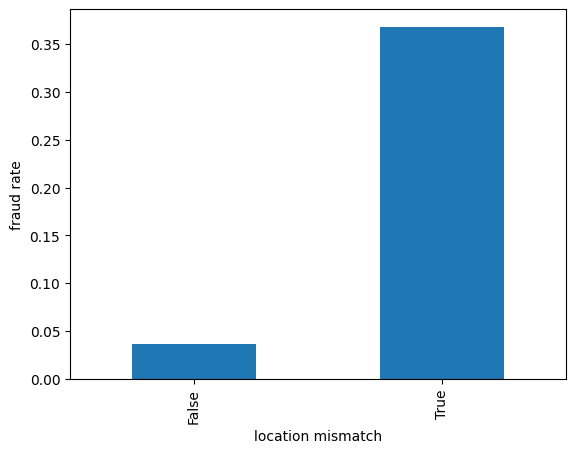

In [ ]:
df.groupby('location_mismatch')['is_fraud'].mean().plot.bar()
plt.ylabel('fraud rate')
plt.xlabel('location mismatch')
plt.show

In [ ]:
cat_cols = df.select_dtypes(include =['object','category']).columns
cat_cols

Index(['transaction_id', 'customer_id', 'home_country', 'source_currency',
       'dest_currency', 'channel', 'device_id', 'ip_address', 'ip_country',
       'kyc_tier'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

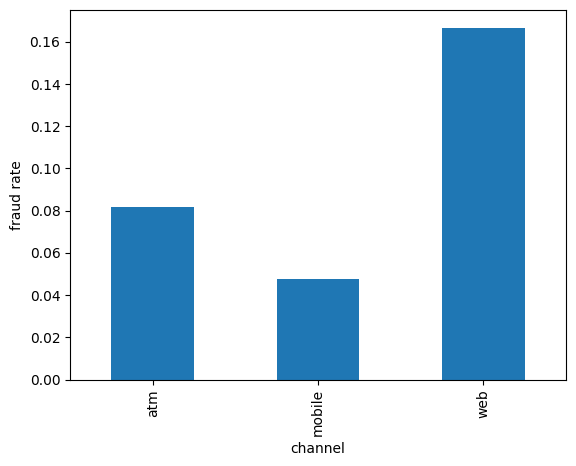

In [ ]:
df.groupby('channel')['is_fraud'].mean().plot.bar()
plt.ylabel('fraud rate')
plt.xlabel('channel')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

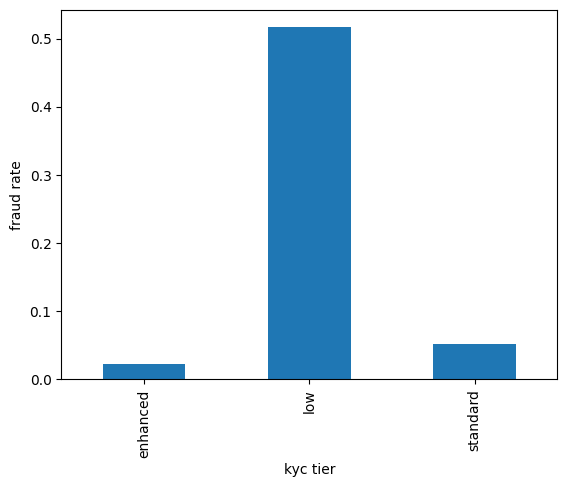

In [ ]:
df.groupby('kyc_tier')['is_fraud'].mean().plot.bar()
plt.ylabel('fraud rate')
plt.xlabel('kyc tier')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

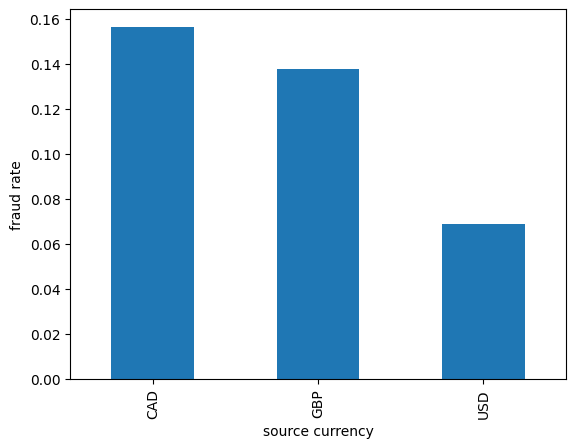

In [ ]:
df.groupby('source_currency')['is_fraud'].mean().plot.bar()
plt.ylabel('fraud rate')
plt.xlabel('source currency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

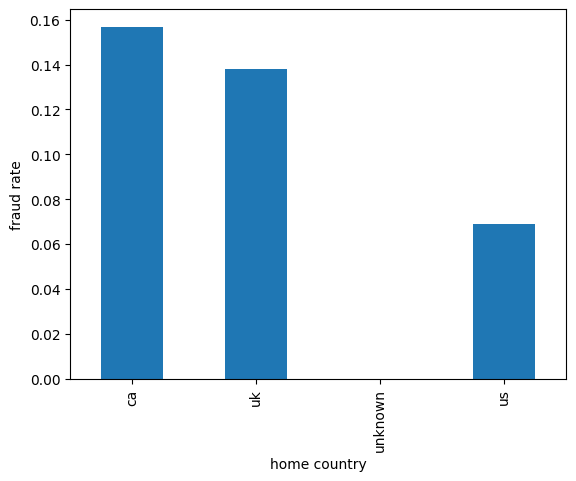

In [ ]:
df.groupby('home_country')['is_fraud'].mean().plot.bar()
plt.ylabel('fraud rate')
plt.xlabel('home country')
plt.show

In [ ]:
df['home_country'].unique()

array(['US', 'CA', 'UK', ' UK  ', ' US  ', 'unknown', ' CA  '],
      dtype=object)

In [ ]:
df['home_country'] = df['home_country'].str.lower().str.strip()

Feature Engineering

In [ ]:
# Extract time - based features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Monday. 6=Sunday
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

print("Time features created:")
print(df[['timestamp', 'hour', 'day_of_week', 'is_weekend']].head())
print("nHour distriburion:")
print(df['hour'].value_counts().sort_index())

Time features created:
                         timestamp  hour  day_of_week  is_weekend
0 2022-10-03 18:40:59.468549+00:00    18            0           0
1 2022-10-03 20:39:38.468549+00:00    20            0           0
2 2022-10-03 23:02:43.468549+00:00    23            0           0
3 2022-10-04 01:08:53.468549+00:00     1            1           0
4 2022-10-04 09:35:03.468549+00:00     9            1           0
nHour distriburion:
hour
0     452
1     398
2     413
3     480
4     503
5     471
6     464
7     439
8     471
9     425
10    444
11    424
12    447
13    444
14    413
15    467
16    461
17    422
18    467
19    491
20    434
21    423
22    450
23    477
Name: count, dtype: int64


fraud_by_hour


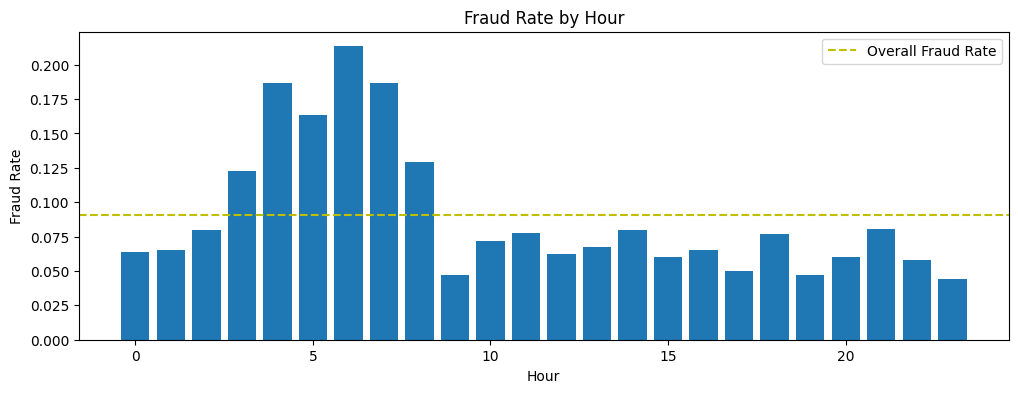

In [ ]:
# fraud rate by hour
fraud_rate_hour = df.groupby('hour')['is_fraud'].mean()

print('fraud_by_hour')

plt.figure(figsize=(12, 4))
plt.bar(fraud_rate_hour.index, fraud_rate_hour.values)
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Hour')
plt.axhline(y=df ['is_fraud'].mean(), color='y', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.show()

In [ ]:
df['account_age_days'].describe()


,account_age_days
count,10780.00000
mean,393.49898
std,342.17545
min,1.00000
25%,147.00000
50%,285.00000
75%,661.00000
max,1095.00000


/tmp/ipython-input-3985194789.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age = df.groupby('age_bucket')['is_fraud'].mean()


age_bucket
<30d        0.368681
30-90d      0.442584
90-180d     0.023736
180-365d    0.016901
>1yr        0.010534
Name: is_fraud, dtype: float64


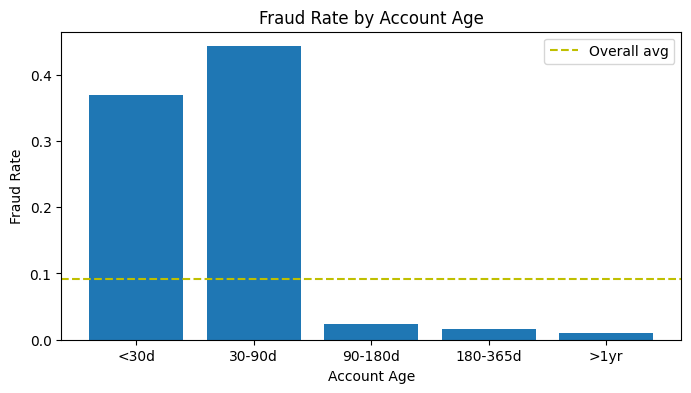

In [ ]:
# Fraud rate by account age buckets
df['age_bucket'] = pd.cut(df['account_age_days'],
                          bins=[0, 30, 90, 180, 365, 2000],
                          labels=['<30d', '30-90d', '90-180d', '180-365d', '>1yr'])
fraud_by_age = df.groupby('age_bucket')['is_fraud'].mean()
print(fraud_by_age)

plt.figure(figsize=(8, 4))
plt.bar(range(len(fraud_by_age)), fraud_by_age.values)
plt.xticks(range(len(fraud_by_age)), fraud_by_age.index)
plt.xlabel('Account Age')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Account Age')
plt.axhline(y=df['is_fraud'].mean(), color='y', linestyle='--', label='Overall avg')
plt.legend()
plt.show()


txn_velocity_1h
0    0.017459
1    0.000000
2    0.000000
3    0.835878
4    0.842324
5    0.801047
6    0.700000
7    0.702703
8    0.482759
Name: is_fraud, dtype: float64


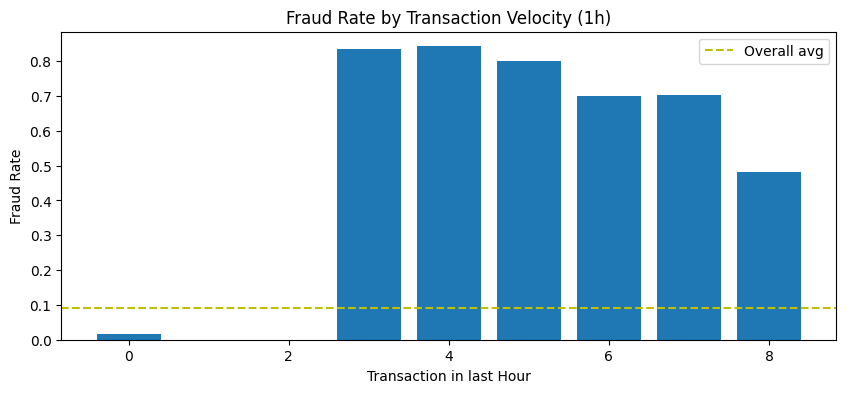

In [ ]:
# fraud rate by velocity (transactions in last hour)
fraud_by_velocity = df.groupby('txn_velocity_1h')['is_fraud'].mean()
print(fraud_by_velocity)

plt.figure(figsize=(10, 4))
plt.bar(fraud_by_velocity.index, fraud_by_velocity.values)
plt.xlabel('Transaction in last Hour')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Velocity (1h)')
plt.axhline(y=df['is_fraud'].mean(), color='y', linestyle='--', label='Overall avg')
plt.legend()
plt.show()

amount_bucket
<$100       0.017952
$100-500    0.061642
$500-1k     0.301768
$1k-2k      0.676806
$2k-5k      0.943820
$5k+        0.140909
Name: is_fraud, dtype: float64


/tmp/ipython-input-2188826391.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age = df.groupby('amount_bucket')['is_fraud'].mean()


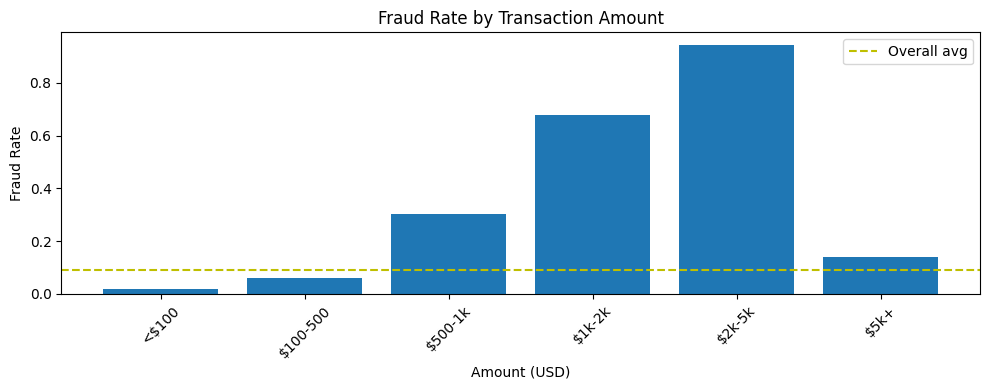

In [ ]:
# fraud rate by amount buckets
df['amount_bucket'] = pd.cut(df['amount_usd'],
                               bins=[0, 100, 500, 1000, 2000, 5000, 20000],
                             labels=['<$100', '$100-500', '$500-1k', '$1k-2k', '$2k-5k', '$5k+'])
fraud_by_age = df.groupby('amount_bucket')['is_fraud'].mean()
print(fraud_by_age)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_age)), fraud_by_age.values)
plt.xticks(range(len(fraud_by_age)), fraud_by_age.index, rotation=45)
plt.xlabel('Amount (USD)')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Amount')
plt.axhline(y=df['is_fraud'].mean(), color='y', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df['ip_risk_score'].describe()

,ip_risk_score
count,10780.000000
mean,0.383604
std,0.251731
min,0.004000
25%,0.207000
50%,0.321000
75%,0.476000
max,1.000000


ip_rsik_bucket
low<0.3     0.014604
0.3-0.5     0.022482
0.5-0.7     0.029552
0.7-0.8     0.194245
High>0.8    0.625707
Name: is_fraud, dtype: float64


/tmp/ipython-input-1285505997.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_ip = df.groupby('ip_rsik_bucket')['is_fraud'].mean()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

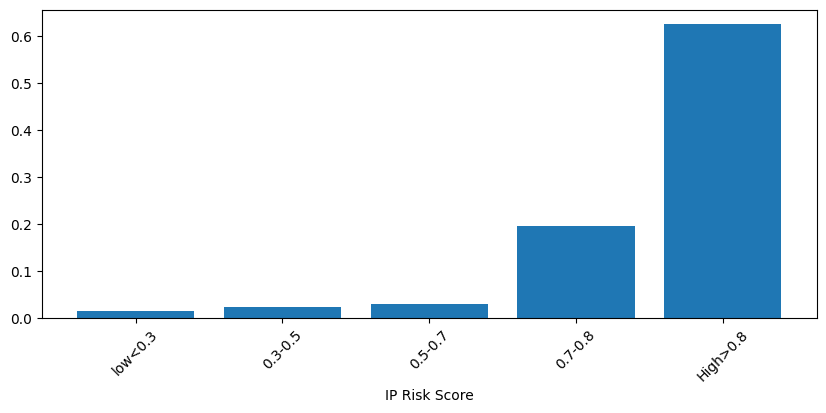

In [ ]:
# Fraud rate by IP risk score buckets
df['ip_rsik_bucket'] = pd.cut(df['ip_risk_score'],
                              bins=[0, 0.3, 0.5, 0.7, 0.8, 1.0],
                              labels=['low<0.3', '0.3-0.5', '0.5-0.7', '0.7-0.8', 'High>0.8'])
fraud_by_ip = df.groupby('ip_rsik_bucket')['is_fraud'].mean()
print(fraud_by_ip)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_ip)), fraud_by_ip.values)
plt.xticks(range(len(fraud_by_ip)), fraud_by_ip.index, rotation=45)
plt.xlabel('IP Risk Score')
plt

/tmp/ipython-input-386573552.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_device = df.groupby('device_trust_bucket')['is_fraud'].mean()


device_trust_bucket
Low,0.3     0.846260
0.3-0.5     0.111424
0.5-0.7     0.020379
0.7-0.9     0.032597
High>0.9    0.008133
Name: is_fraud, dtype: float64


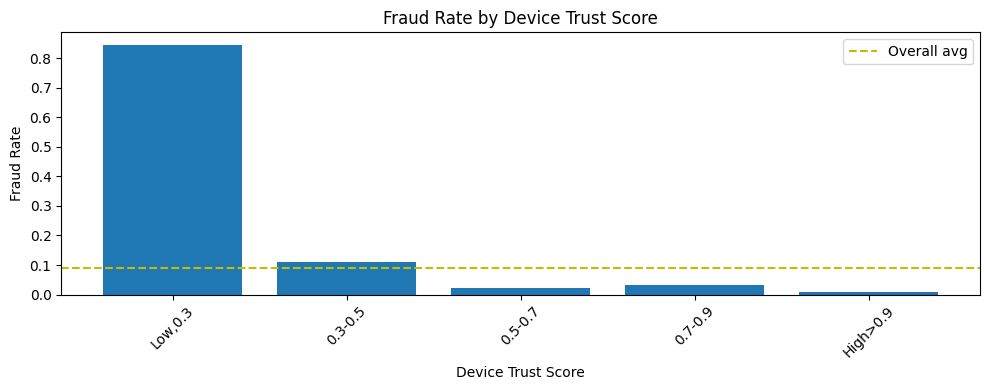

In [ ]:
# fraud rate by device trust score buckets
df['device_trust_bucket'] = pd.cut(df['device_trust_score'],
                                   bins=[0, 0.3, 0.5, 0.7, 0.9, 1.0],
                                   labels=['Low,0.3', '0.3-0.5', '0.5-0.7', '0.7-0.9', 'High>0.9'])
fraud_by_device = df.groupby('device_trust_bucket')['is_fraud'].mean()
print(fraud_by_device)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_device)), fraud_by_device.values)
plt.xticks(range(len(fraud_by_device)), fraud_by_device.index, rotation=45)
plt.xlabel('Device Trust Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Device Trust Score')
plt.axhline(y=df['is_fraud'].mean(), color='y', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

1. Aggregate per‑customer metrics (frequency, value, recency)
1.1 Basic per‑customer aggregates

Cell 3 – aggregate by customer:

In [ ]:
# Sort for consistent recency calculations
df = df.sort_values('timestamp')

# Per-customer aggregates
cust_agg = df.groupby('customer_id').agg(
    txn_count=('transaction_id', 'count'),
    total_amount_usd=('amount_usd', 'sum'),
    avg_amount_usd=('amount_usd', 'mean'),
    first_txn_time=('timestamp', 'min'),
    last_txn_time=('timestamp', 'max')
).reset_index()

# Recency in days relative to dataset max timestamp
max_time = df['timestamp'].max()
cust_agg['recency_days'] = (max_time - cust_agg['last_txn_time']).dt.days

cust_agg.head()


,customer_id,txn_count,total_amount_usd,avg_amount_usd,first_txn_time,last_txn_time,recency_days
0,0006f893-10a8-4235-831b-fcae1e3f0140,1,540.09,540.09,2023-12-24 15:43:45.573611+00:00,2023-12-24 15:43:45.573611+00:00,722
1,00147b79-11ed-4f8f-a3af-651778b78dd3,1,286.04,286.04,2024-04-12 02:12:31.573611+00:00,2024-04-12 02:12:31.573611+00:00,612
2,00668d83-6f9f-4401-9a0f-04f94140abb6,1,99.21,99.21,2025-10-15 14:02:56.573611+00:00,2025-10-15 14:02:56.573611+00:00,61
3,00957a15-945f-4bfb-b5fc-d867cbaee95d,1,2730.91,2730.91,2024-07-14 22:19:08.573611+00:00,2024-07-14 22:19:08.573611+00:00,519
4,00ab675d-a6ea-4d6e-bcdf-79027ce4f944,1,146.36,146.36,2024-07-13 09:52:36.573611+00:00,2024-07-13 09:52:36.573611+00:00,520


1.2 Join back to transaction level (if needed for modelling)

Cell 4 – merge customer features back:

In [ ]:
df = df.merge(
    cust_agg[['customer_id', 'txn_count', 'total_amount_usd',
              'avg_amount_usd', 'recency_days']],
    on='customer_id',
    how='left'
)

df.head()


,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,day_of_week,is_weekend,age_bucket,amount_bucket,ip_rsik_bucket,device_trust_bucket,txn_count,total_amount_usd,avg_amount_usd,recency_days
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,us,USD,CAD,atm,278.19,278.19,4.25,...,0,0,180-365d,$100-500,low<0.3,0.5-0.7,1429,541976.41,379.269706,16
1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38.468549+00:00,ca,CAD,MXN,web,208.51,154.29,4.24,...,0,0,>1yr,$100-500,0.5-0.7,0.3-0.5,340,111721.55,328.592794,59
2,fc855034-3ea5-4993-9afa-b511d93fe5e8,6d0d9b27-fa26-45f8-93b1-2df29d182d9c,2022-10-03 23:02:43.468549+00:00,us,USD,CNY,mobile,160.33,160.33,2.70,...,0,0,>1yr,$100-500,0.3-0.5,High>0.9,995,389839.57,391.798563,0
3,2cf8c08e-42ec-444d-a755-34b9a2a0a4ca,7bd5200c-5d19-44f0-9afe-8b339a05366b,2022-10-04 01:08:53.468549+00:00,us,USD,EUR,mobile,59.41,59.41,2.22,...,1,0,90-180d,<$100,0.5-0.7,0.5-0.7,769,355004.15,461.643888,74
4,d907a74d-b426-438d-97eb-dbe911aca91c,70a93d26-8e3a-4179-900c-a4a7a74d08e5,2022-10-04 09:35:03.468549+00:00,us,USD,INR,mobile,200.96,200.96,3.61,...,1,0,180-365d,$100-500,low<0.3,0.7-0.9,647,261406.01,404.027836,37


2. Corridor, time‑of‑day, and weekday features
2.1 Corridor features

Cell 5 – define corridor columns:

In [ ]:
# Corridor string (home_country to dest_currency, or home_country to dest_country)
df['corridor'] = df['home_country'] + "->" + df['dest_currency']

# Aggregate risk at corridor level (overall fraud rate & volume)
corridor_stats = df.groupby('corridor').agg(
    corridor_txn_count=('transaction_id', 'count'),
    corridor_fraud_rate=('is_fraud', 'mean'),
    corridor_avg_amount_usd=('amount_usd', 'mean')
).reset_index()

corridor_stats.head()


,corridor,corridor_txn_count,corridor_fraud_rate,corridor_avg_amount_usd
0,ca->CAD,143,0.069930,207.974825
1,ca->CNY,134,0.052239,299.437164
2,ca->EUR,122,0.081967,233.529098
3,ca->GBP,121,0.066116,350.978512
4,ca->INR,178,0.601124,561.711742


Cell 6 – join corridor stats back:

In [ ]:
df = df.merge(
    corridor_stats[['corridor', 'corridor_txn_count',
                    'corridor_fraud_rate', 'corridor_avg_amount_usd']],
    on='corridor',
    how='left'
)

df.head()


,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_rsik_bucket,device_trust_bucket,txn_count,total_amount_usd,avg_amount_usd,recency_days,corridor,corridor_txn_count,corridor_fraud_rate,corridor_avg_amount_usd
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,us,USD,CAD,atm,278.19,278.19,4.25,...,low<0.3,0.5-0.7,1429,541976.41,379.269706,16,us->CAD,854,0.028103,442.478173
1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38.468549+00:00,ca,CAD,MXN,web,208.51,154.29,4.24,...,0.5-0.7,0.3-0.5,340,111721.55,328.592794,59,ca->MXN,123,0.089431,577.912033
2,fc855034-3ea5-4993-9afa-b511d93fe5e8,6d0d9b27-fa26-45f8-93b1-2df29d182d9c,2022-10-03 23:02:43.468549+00:00,us,USD,CNY,mobile,160.33,160.33,2.70,...,0.3-0.5,High>0.9,995,389839.57,391.798563,0,us->CNY,884,0.039593,453.468314
3,2cf8c08e-42ec-444d-a755-34b9a2a0a4ca,7bd5200c-5d19-44f0-9afe-8b339a05366b,2022-10-04 01:08:53.468549+00:00,us,USD,EUR,mobile,59.41,59.41,2.22,...,0.5-0.7,0.5-0.7,769,355004.15,461.643888,74,us->EUR,871,0.028703,464.770471
4,d907a74d-b426-438d-97eb-dbe911aca91c,70a93d26-8e3a-4179-900c-a4a7a74d08e5,2022-10-04 09:35:03.468549+00:00,us,USD,INR,mobile,200.96,200.96,3.61,...,low<0.3,0.7-0.9,647,261406.01,404.027836,37,us->INR,847,0.021251,439.053388


2.2 Time of day and weekday patterns

Cell 7 – create time features:

In [ ]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek  # 0=Mon, 6=Sun
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

df[['timestamp', 'hour', 'dayofweek', 'is_weekend']].head()


,timestamp,hour,dayofweek,is_weekend
0,2022-10-03 18:40:59.468549+00:00,18,0,0
1,2022-10-03 20:39:38.468549+00:00,20,0,0
2,2022-10-03 23:02:43.468549+00:00,23,0,0
3,2022-10-04 01:08:53.468549+00:00,1,1,0
4,2022-10-04 09:35:03.468549+00:00,9,1,0


Cell 8 – aggregate patterns by hour and weekday:

In [ ]:
# Fraud rate by hour
hour_stats = df.groupby('hour')['is_fraud'].mean().reset_index()

# Fraud rate by weekday
dow_stats = df.groupby('dayofweek')['is_fraud'].mean().reset_index()

hour_stats.head(), dow_stats.head()


(   hour  is_fraud
 0     0  0.064159
 1     1  0.065327
 2     2  0.079903
 3     3  0.122917
 4     4  0.186879,
    dayofweek  is_fraud
 0          0  0.082855
 1          1  0.101477
 2          2  0.084600
 3          3  0.098852
 4          4  0.087150)

3. Visualise distributions and correlations (fraud vs non‑fraud)
3.1 Distributions for key numeric features

Pick a few important numeric features to compare.​

Cell 9 – histograms by fraud label:

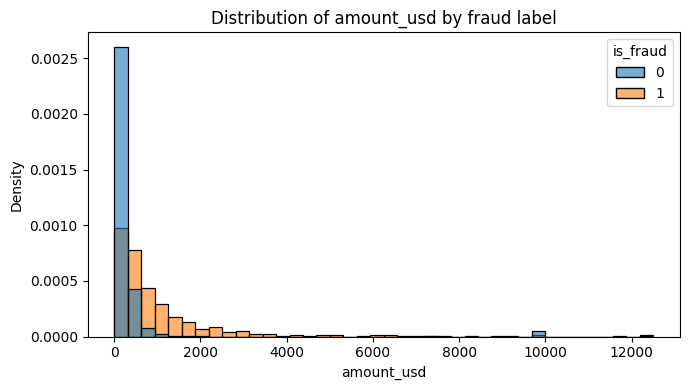

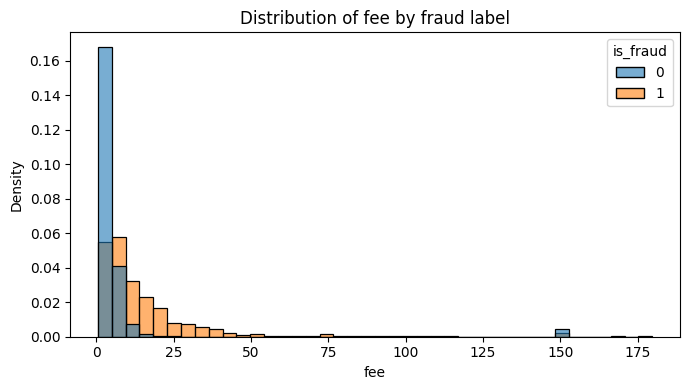

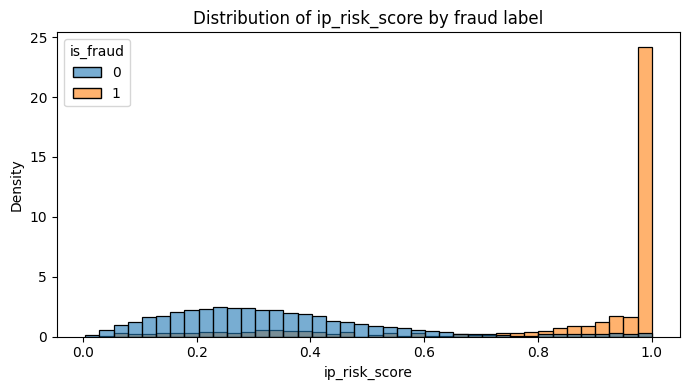

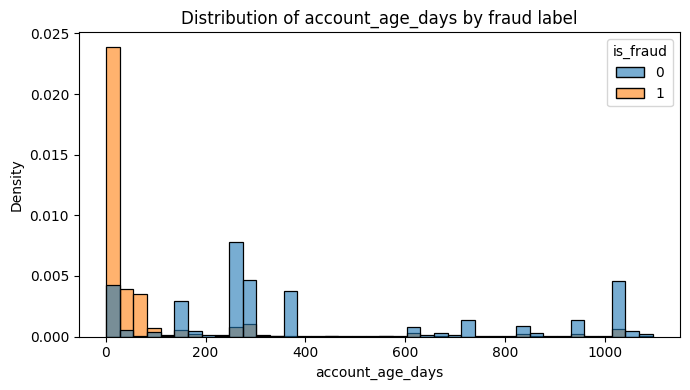

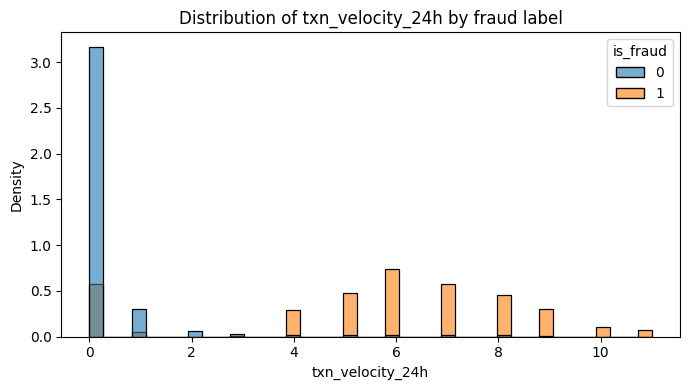

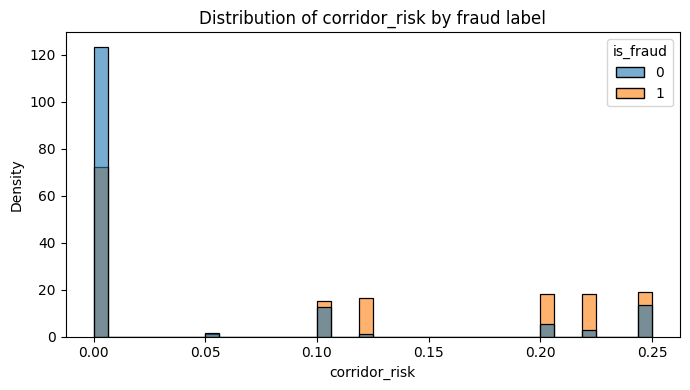

In [ ]:
numeric_features = [
    'amount_usd', 'fee', 'ip_risk_score',
    'account_age_days', 'txn_velocity_24h', 'corridor_risk'
]

for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.histplot(
        data=df,
        x=col,
        hue='is_fraud',
        bins=40,
        stat='density',
        common_norm=False,
        alpha=0.6
    )
    plt.title(f"Distribution of {col} by fraud label")
    plt.tight_layout()
    plt.show()


3.2 Boxplots (fraud vs non‑fraud)

Cell 10 – boxplots for skewed features:3.2 Boxplots (fraud vs non‑fraud)

Cell 10 – boxplots for skewed features:

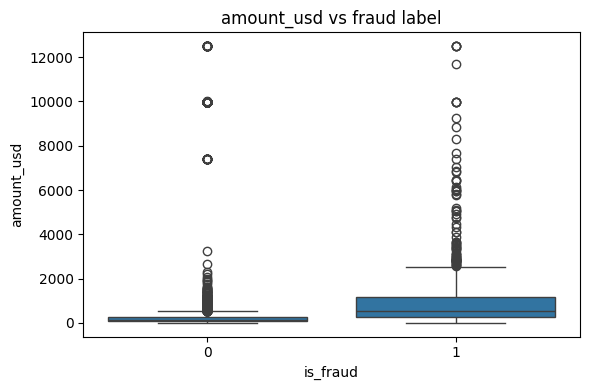

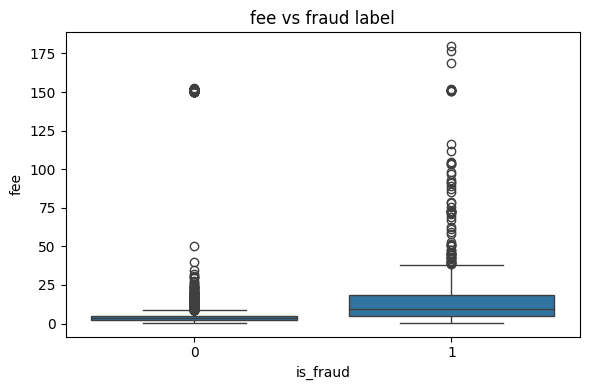

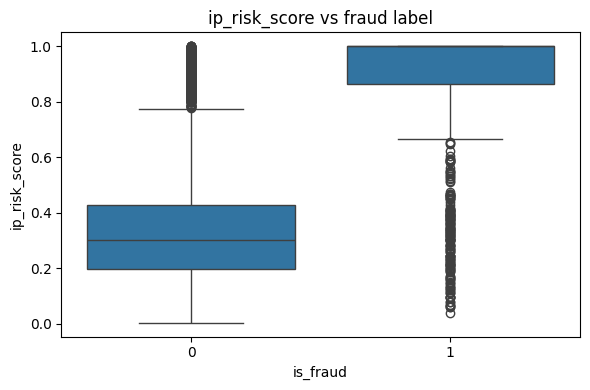

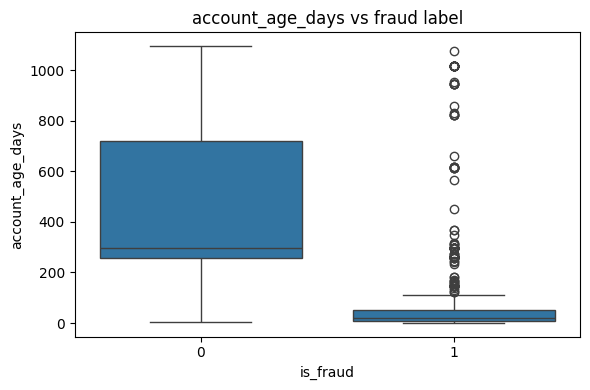

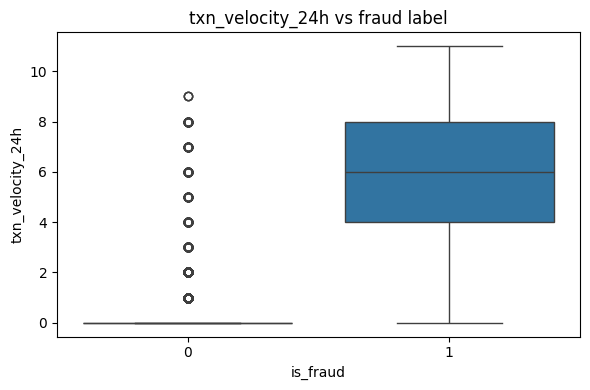

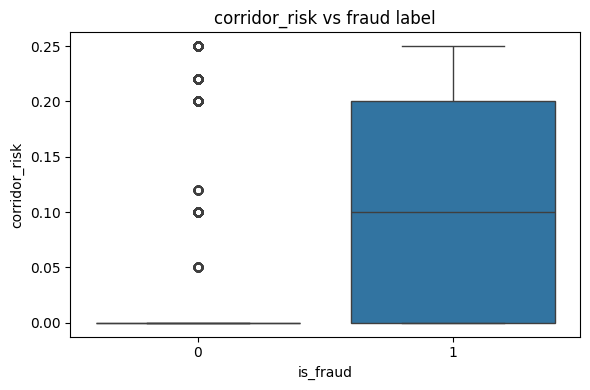

In [ ]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='is_fraud',
        y=col
    )
    plt.title(f"{col} vs fraud label")
    plt.tight_layout()
    plt.show()


3.3 Correlation matrices (overall and within classes)

To avoid leaking the label into features, do two views: overall correlations between features, and then correlations between features and is_fraud.​

Cell 11 – correlation matrix for selected features:

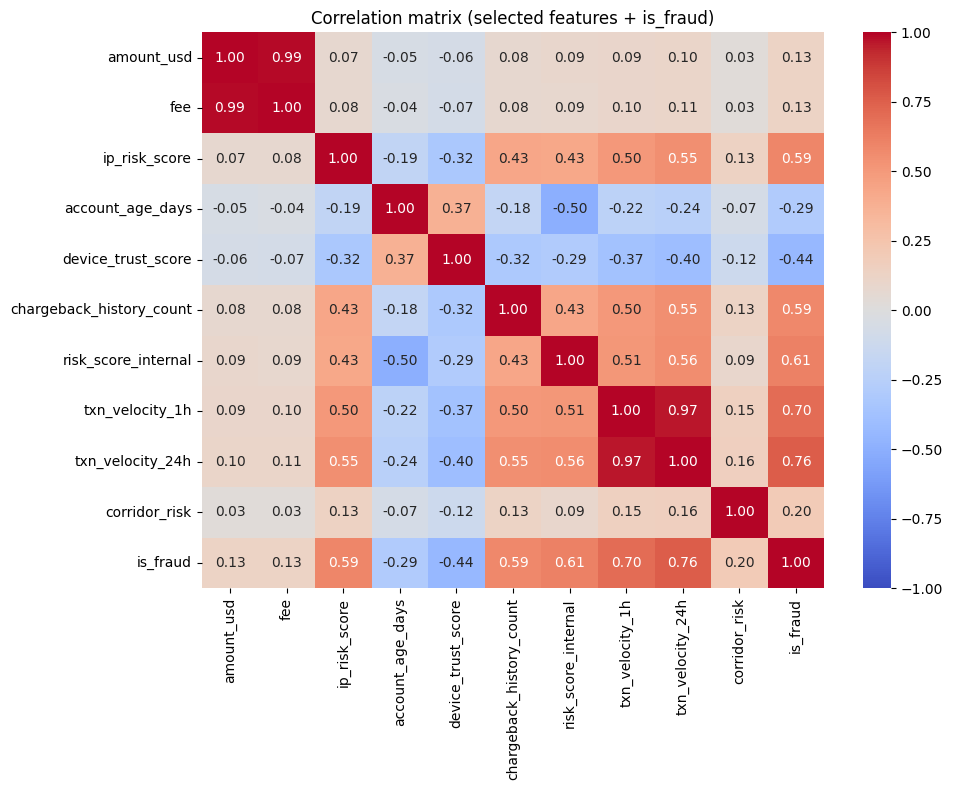

In [ ]:
corr_cols = [
    'amount_usd', 'fee', 'ip_risk_score', 'account_age_days',
    'device_trust_score', 'chargeback_history_count',
    'risk_score_internal', 'txn_velocity_1h', 'txn_velocity_24h',
    'corridor_risk', 'is_fraud'
]

corr = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix (selected features + is_fraud)")
plt.tight_layout()
plt.show()


3.4 Correlations separately for fraud vs non‑fraud (optional)

Cell 12 – split and compare:

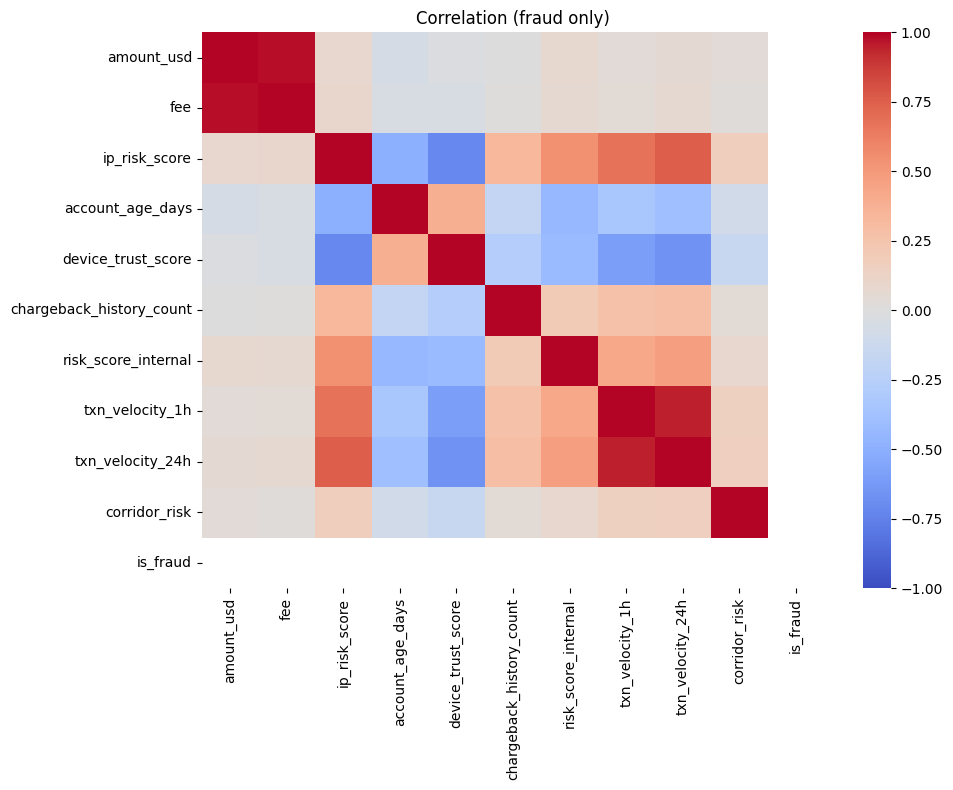

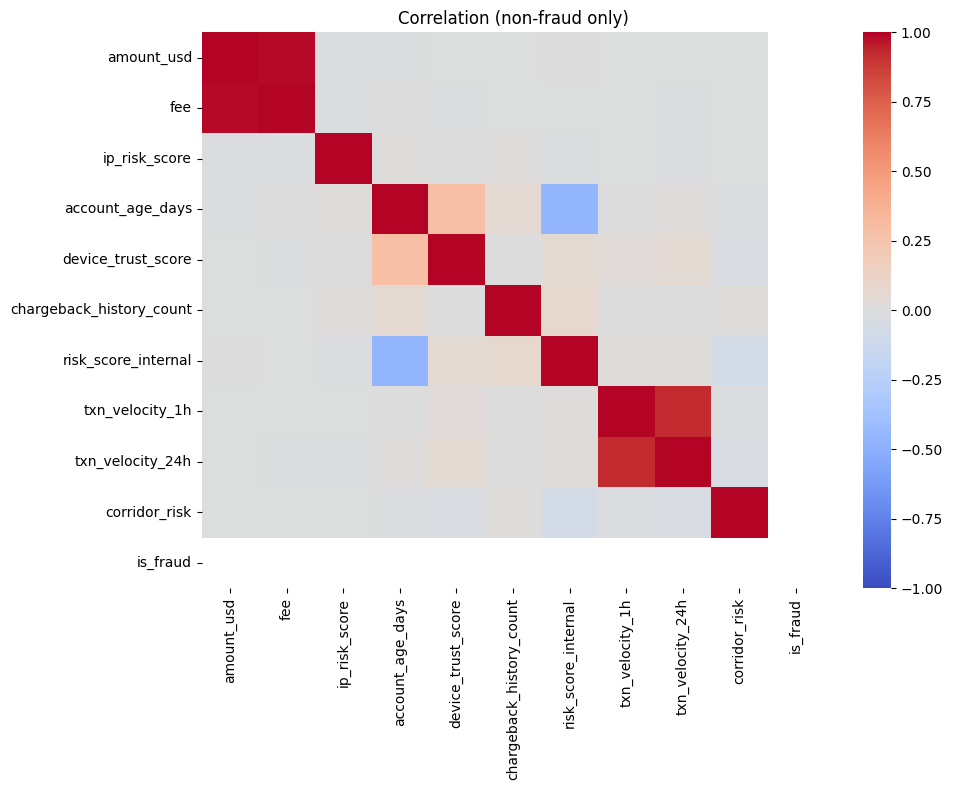

In [ ]:
df_fraud = df[df['is_fraud'] == 1]
df_nonfraud = df[df['is_fraud'] == 0]

corr_fraud = df_fraud[corr_cols].corr()
corr_nonfraud = df_nonfraud[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_fraud, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation (fraud only)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(corr_nonfraud, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation (non-fraud only)")
plt.tight_layout()
plt.show()
